In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("breast_cancer_datasets.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
target=(df['diagnosis']=='M').astype(int)
label=df["diagnosis"]

In [6]:
target.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int32

In [7]:
df=df.drop(["Unnamed: 32","diagnosis","id"],axis=1)

In [8]:
target.value_counts()/len(target)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [9]:
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [10]:
from sklearn.feature_selection import SelectKBest, chi2   # top 16 features selected based on chi-squared test

bestfeatures=SelectKBest(chi2)
features = bestfeatures.fit(df,target)
dfscores = pd.DataFrame(features.scores_)
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 16 best features

                features          Score
23            area_worst  112598.431564
3              area_mean   53991.655924
13               area_se    8758.504705
22       perimeter_worst    3665.035416
2         perimeter_mean    2011.102864
20          radius_worst     491.689157
0            radius_mean     266.104917
12          perimeter_se     250.571896
21         texture_worst     174.449400
1           texture_mean      93.897508
26       concavity_worst      39.516915
10             radius_se      34.675247
6         concavity_mean      19.712354
25     compactness_worst      19.314922
27  concave points_worst      13.485419
7    concave points_mean      10.544035


In [11]:
featureScores=featureScores.sort_values(by='Score',ascending=False)

In [12]:
Features=list(featureScores.iloc[:16,0])
Features

['area_worst',
 'area_mean',
 'area_se',
 'perimeter_worst',
 'perimeter_mean',
 'radius_worst',
 'radius_mean',
 'perimeter_se',
 'texture_worst',
 'texture_mean',
 'concavity_worst',
 'radius_se',
 'concavity_mean',
 'compactness_worst',
 'concave points_worst',
 'concave points_mean']

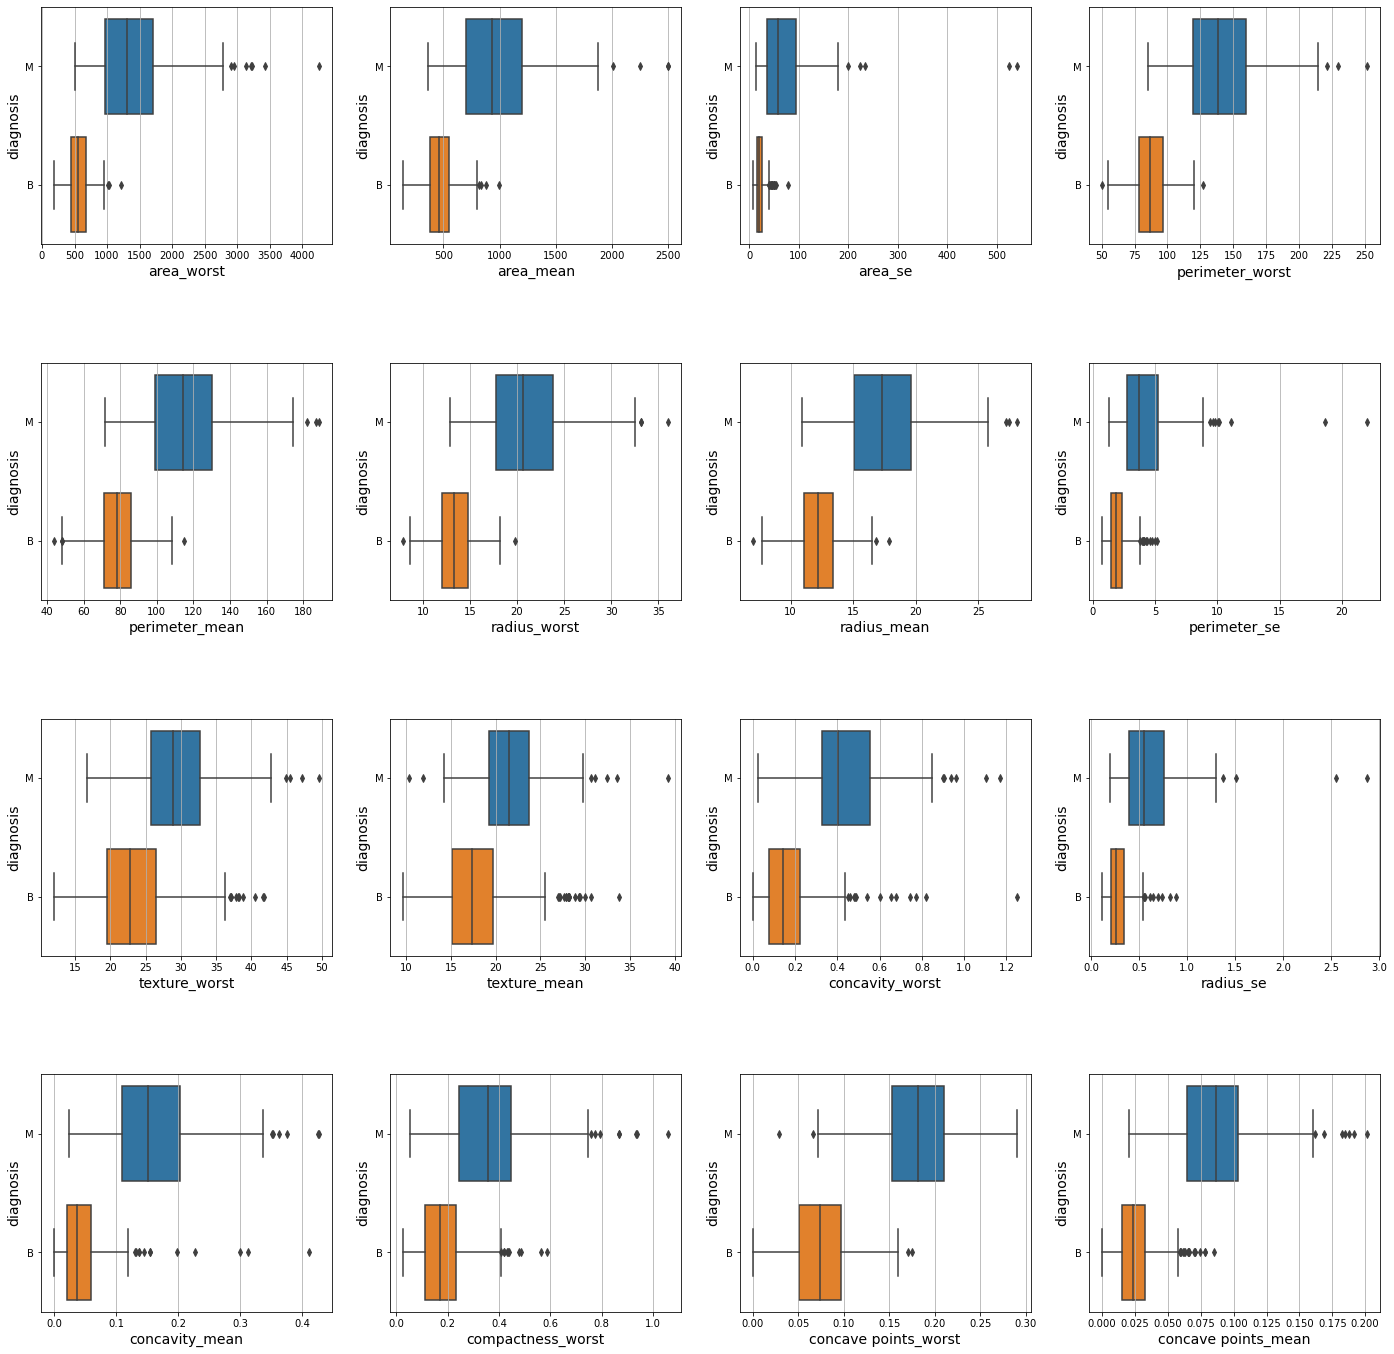

In [13]:
import seaborn as sns  # for visualization of features
import matplotlib.pyplot as plt

n_rows=4
n_columns=4
plt.figure(figsize=(24,24))


i=0
for rows in range(n_rows):
    for columns in range(n_columns):
        index=rows*n_rows+columns
        plt.subplot(n_rows,n_columns,index+1)
        plt.grid("on")
        plt.xlabel(Features[i],fontsize=14)
        plt.ylabel("diagnosis",fontsize=14)
        sns.boxplot(x=df[Features[i]],y=label,data=df,order=["M","B"])
        plt.subplots_adjust(wspace=0.2,hspace=0.5)
        i+=1

In [ ]:
#The peaks of both class do not differ much as it is a noisy feature.

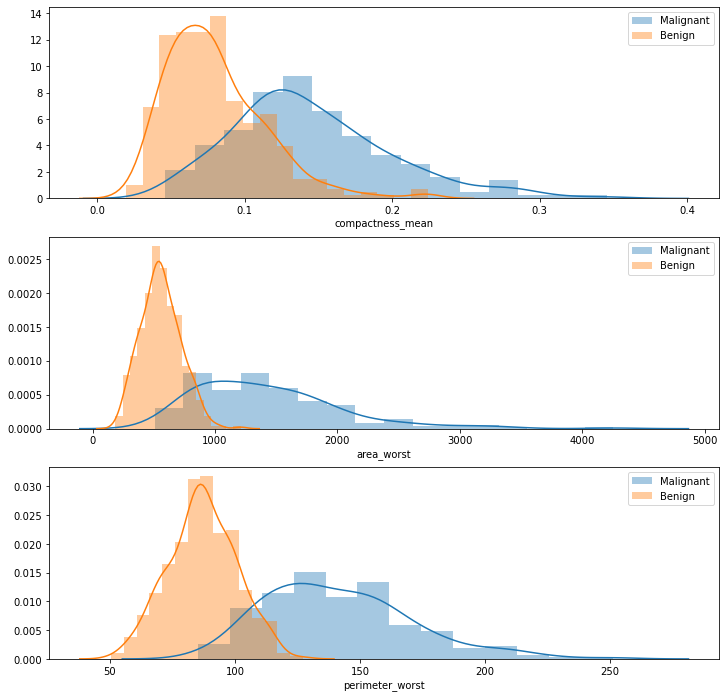

In [29]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
sns.distplot(df["compactness_mean"][label=='M'],label="Malignant")  # Noisy feature
sns.distplot(df["compactness_mean"][label=='B'],label="Benign")
plt.legend()

plt.subplot(3,1,2)
sns.distplot(df["area_worst"][label=='M'],label="Malignant")      # Good Feature
sns.distplot(df["area_worst"][label=='B'],label="Benign")
plt.legend()

plt.subplot(3,1,3)
sns.distplot(df["perimeter_worst"][label=='M'],label="Malignant")      # Good Feature
sns.distplot(df["perimeter_worst"][label=='B'],label="Benign")
plt.legend()

In [52]:
num_bins=100
def overlap_area(data1,data2):
    xmin = min(data1.min(), data2.min())
    xmax = max(data1.max(), data2.max())
    bins = np.linspace(xmin, xmax, num_bins)
    weights1 = np.ones_like(data1) / float(len(data1))
    weights2 = np.ones_like(data2) / float(len(data2))

    hist_1 = np.histogram(data1, bins, weights=weights1)[0]
    hist_2 = np.histogram(data2, bins, weights=weights2)[0]
    
    tvd = 0.5*sum(abs(hist_1 - hist_2))
    res=(1-tvd)*100
    return res

In [53]:
data1=df["compactness_mean"][label=='M']
data2=df["compactness_mean"][label=='B']
data=df["compactness_mean"]

overlap_compactness_mean=overlap_area(data1,data2)   # high overlap area
overlap_compactness_mean

40.053379842502835

In [54]:
data1=df["area_worst"][label=='M']
data2=df["area_worst"][label=='B']
data=df["area_worst"]

overlap_mismatch_area_worst=overlap_area(data1,data2)
overlap_mismatch_area_worst

19.384546271338586

In [55]:
data1=df["perimeter_worst"][label=='M']
data2=df["perimeter_worst"][label=='B']
data=df["perimeter_worst"]

overlap_mismatch_area_worst=overlap_area(data1,data2)
overlap_mismatch_area_worst

16.319169177104655

In [112]:
X=df[Features]
y=target

In [113]:
from sklearn.model_selection import StratifiedShuffleSplit

ss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in ss.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [114]:
y_train.value_counts()/len(y_train)

0    0.626374
1    0.373626
Name: diagnosis, dtype: float64

In [115]:
y_test.value_counts()/len(y_test)                # slight sampling bias....can be ignored

0    0.631579
1    0.368421
Name: diagnosis, dtype: float64

In [116]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [117]:
# Train models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

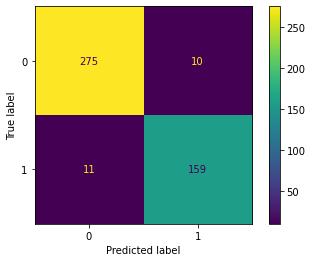

In [118]:
from sklearn.model_selection import cross_val_predict

y_pred_sgd=cross_val_predict(sgd_clf,X_train,y_train,cv=3)
cm=confusion_matrix(y_train,y_pred_sgd)
cm_display = ConfusionMatrixDisplay(cm).plot()

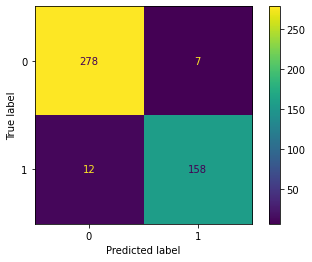

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=42)
y_pred_rf=cross_val_predict(rf_clf,X_train,y_train,cv=3)   
cm_rf=confusion_matrix(y_train,y_pred_rf)
cm_display = ConfusionMatrixDisplay(cm_rf).plot()

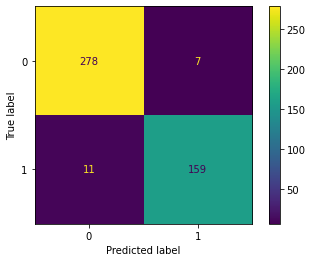

In [120]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
y_pred_lr=cross_val_predict(lr,X_train,y_train,cv=3)   
cm_lr=confusion_matrix(y_train,y_pred_lr)
cm_display = ConfusionMatrixDisplay(cm_lr).plot()

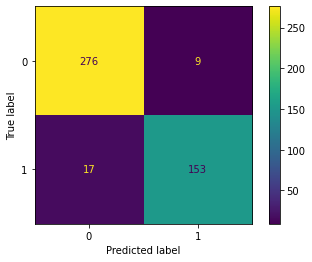

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
y_pred_knn=cross_val_predict(knn,X_train,y_train,cv=3)   

cm_knn=confusion_matrix(y_train,y_pred_knn)
cm_display = ConfusionMatrixDisplay(cm_knn).plot()

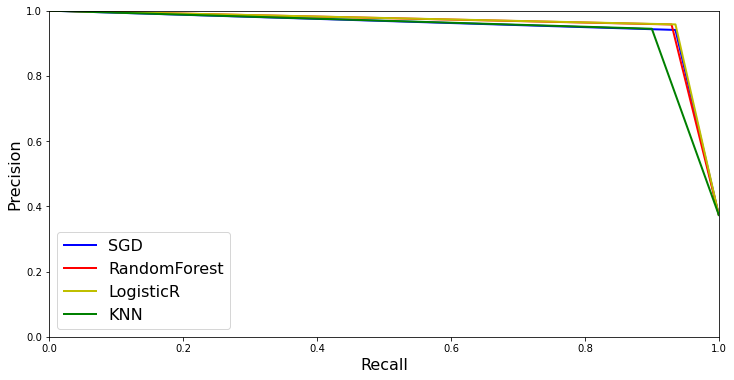

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve

# We will compare the precision-recall curve for different estimators .

model=['SGD','RandomForest','LogisticR','KNN']            
c=['b','r','y','g']
y_pred=[y_pred_sgd,y_pred_rf,y_pred_lr,y_pred_knn]

plt.figure(figsize=(12, 6))
for i in range(len(y_pred)):
    precision,recall,threshold=precision_recall_curve(y_train,y_pred[i])
    plt.plot(recall,precision,linewidth=2,color=c[i],label=model[i])
    plt.ylim([0,1])
    plt.ylabel("Precision",fontsize=16)
    plt.xlabel("Recall",fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.axis([0, 1, 0, 1])          # all models almost perform equally in the curve,hence this curve doesn't yield any deep insights.

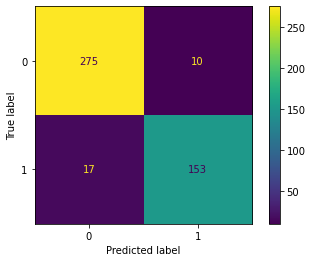

In [123]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
y_pred_nb=cross_val_predict(nb_clf,X_train,y_train,cv=3)   

cm_nb=confusion_matrix(y_train,y_pred_nb)
cm_display = ConfusionMatrixDisplay(cm_nb).plot()

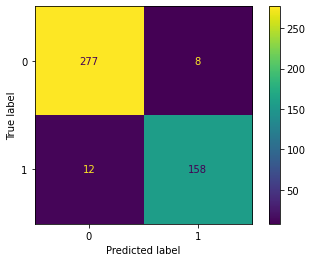

In [124]:
from sklearn.svm import SVC
svc=SVC()
y_pred_svc=cross_val_predict(svc,X_train,y_train,cv=3)   

cm_svc=confusion_matrix(y_train,y_pred_svc)
cm_display = ConfusionMatrixDisplay(cm_svc).plot()

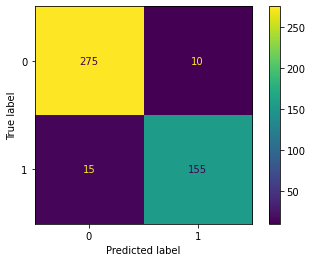

In [125]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
y_pred_p=cross_val_predict(perceptron,X_train,y_train,cv=3)   

cm_p=confusion_matrix(y_train,y_pred_p)
cm_display = ConfusionMatrixDisplay(cm_p).plot()

In [126]:
from sklearn.model_selection import GridSearchCV
lr= LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished


GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy', verbose=1)

In [127]:
grid_search.best_score_

0.9648351648351647

In [128]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

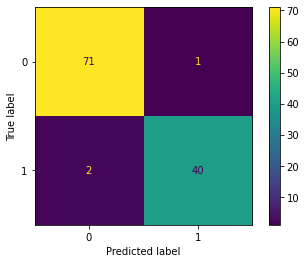

In [129]:
X_test=scaler.transform(X_test)


model=LogisticRegression(C=10,penalty='l2')
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)

cm_test=confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(cm_test).plot()

In [130]:
# Overall accuracy of model 
accuracy=sum(y_pred_test==y_test)/len(y_test)
accuracy                                        # so hyperparameter estimation on small dataset also works.

0.9736842105263158